## Introduction

* An inertial measurement unit (IMU) measures and reports raw or filtered angular rate and specific force/acceleration experienced by the object it is attached to. Data outputs for an IMU are typically body-frame accelerations, angular rates, and (optionally) magnetic field measurements.

* The columns of the dataset are:

1. Category: The category to which this IMU belongs.

2. Manufacturer: Name of the manufacturer.

3. part number: Discrete part number

4. sku: stock keeping unit

5. alt_sku: alternate stock keeping unit

6. Description: description of the product

7. Status: Whether it is in stock or not

8. Quantity: Quantity available

9. Price: Price of the product

10. sku_create_date: when was the product procured

## Pandas Data Analysis

In [19]:
# importing all required libraries
import os
# Data Manipulation
import numpy as np
import pandas as pd
import datetime as dt
# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

* Here i Imported all required libraries,Those are needs for our data manipulation and data vizulization.

In [20]:
# Importing dataset
imus = pd.concat(pd.read_excel("imus+(2).xlsx", sheet_name=None), ignore_index=True)

## Basic Exploration

In [21]:
# First five rows of the dataset
imus.head()

,category,manufacturer,part_number,sku,alt_sku,description,status,qty,price,sku_create_date
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,NaN,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,NaN,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,NaN,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,NaN,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,NaN,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17


* Here i used the head() function i want to see first five observations of the Dataset.Because i want to Understand how Data is distributed at the Starting of Table.

In [22]:
# Last five rows of the dataset
imus.tail()

,category,manufacturer,part_number,sku,alt_sku,description,status,qty,price,sku_create_date
2627921,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627922,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627923,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627924,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627925,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28


* Here i used the tail() function i want to see Last five observations of the Dataset.Because i want to Understand how Data is distributed at the Ending of Table.

In [23]:
# Shape of the dataset
imus.shape

(2627926, 10)

* Here i used df.shape function and it gives me a tuple i.e. (no.of row, no. of column).using this function i can easily see how many rows and columns in given dataset.and in our Dataset there 2627926 obsevations and 10 coulumns.

In [24]:
# Columns present in the dataset
imus.columns

Index(['category', 'manufacturer', 'part_number', 'sku', 'alt_sku',
       'description', 'status', 'qty', 'price', 'sku_create_date'],
      dtype='object')

In [25]:
# To see unique value in each column
imus.nunique()

category              153
manufacturer         1484
part_number        334574
sku                379112
alt_sku              2079
description        339222
status                  2
qty                  2618
price              122688
sku_create_date        10
dtype: int64

In [26]:
# A concise summary of the dataset
imus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627926 entries, 0 to 2627925
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   category         int64         
 1   manufacturer     object        
 2   part_number      object        
 3   sku              object        
 4   alt_sku          object        
 5   description      object        
 6   status           object        
 7   qty              int64         
 8   price            float64       
 9   sku_create_date  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 200.5+ MB


In [27]:
imus = imus.astype({"category" : 'category'})

* Here I change the datatype because category coulumn is categorycal.

In [28]:
# Checking missing values
imus_missing = imus.isna()
imus_missing

,category,manufacturer,part_number,sku,alt_sku,description,status,qty,price,sku_create_date
0,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2627921,False,False,False,False,True,False,False,False,False,False
2627922,False,False,False,False,True,False,False,False,False,False
2627923,False,False,False,False,True,False,False,False,False,False
2627924,False,False,False,False,True,False,False,False,False,False


In [29]:
imus_missing.sum()

category                 0
manufacturer             0
part_number              0
sku                      0
alt_sku            2613442
description              0
status                   0
qty                      0
price                    0
sku_create_date          0
dtype: int64

In [30]:
imus_missing.mean() * 100

category            0.000000
manufacturer        0.000000
part_number         0.000000
sku                 0.000000
alt_sku            99.448843
description         0.000000
status              0.000000
qty                 0.000000
price               0.000000
sku_create_date     0.000000
dtype: float64

<AxesSubplot:>

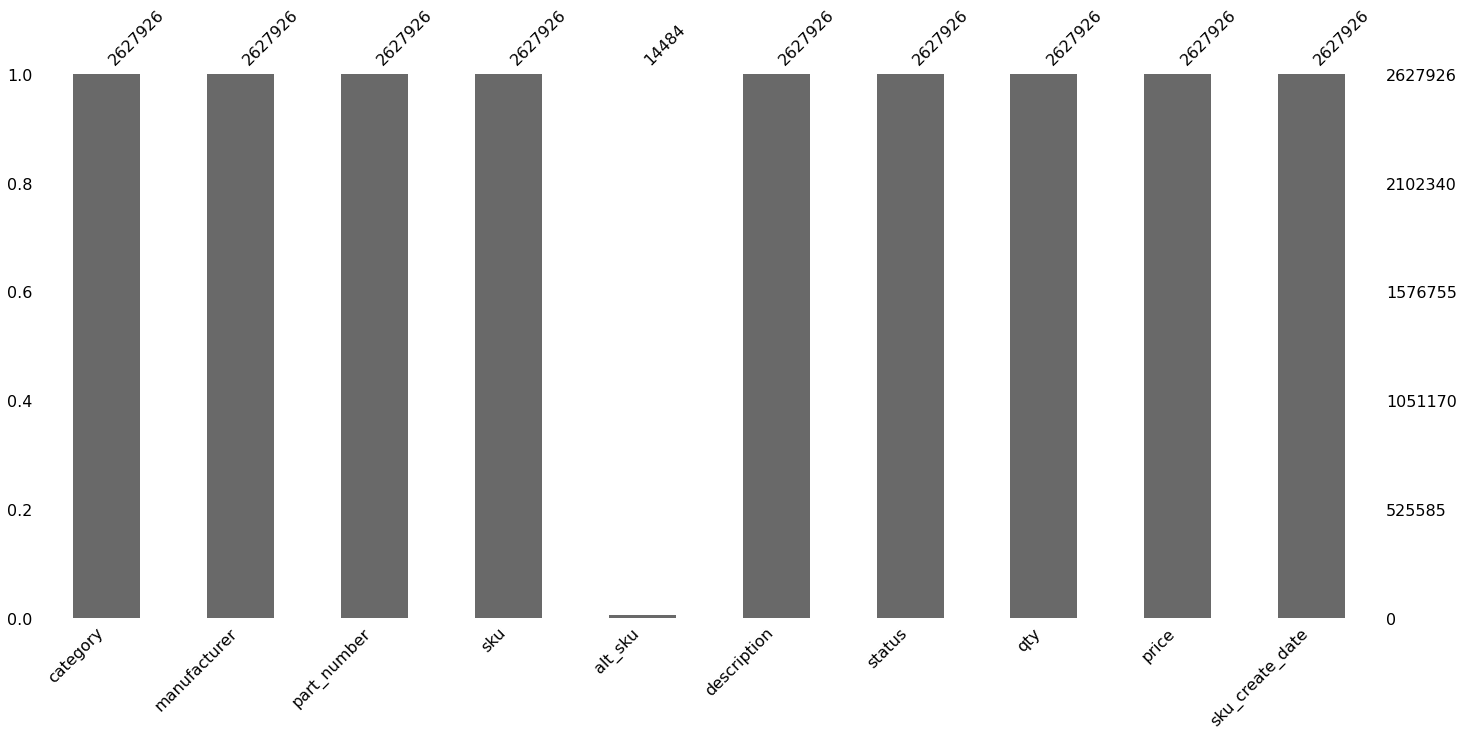

In [31]:
msno.bar(imus)

* Here i can easily see 99.44 % highest missing data i decide to remove it.

In [32]:
imus = imus.drop(['alt_sku'], axis = 1)

In [33]:
imus.head()

,category,manufacturer,part_number,sku,description,status,qty,price,sku_create_date
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17


In [34]:
# Generating descriptive statistics summary
imus.describe()

,qty,price
count,2.627926e+06,2.627926e+06
mean,4.138502e+01,1.882534e+03
std,5.802069e+02,8.202102e+04
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.108000e+01
50%,0.000000e+00,9.531000e+01
75%,2.000000e+00,4.998400e+02
max,6.006300e+04,8.497453e+07


# EXPLORATORY DATA ANALYSIS

In [37]:
imus.status.unique()

array(['No Stock', 'In Stock'], dtype=object)

In [38]:
# For Data In Stock
InStock=imus[imus["status"]=="In Stock"]
InStock

,category,manufacturer,part_number,sku,description,status,qty,price,sku_create_date
253,9920,CASE LOGIC-PERSONAL & PORTABLE,3200943,BA6371,"LAPTOP ROLLING CASE BLACK, SECURITY FRIENDLY 17IN",In Stock,7,99.00,2020-08-17
271,531,OMNITRON SYSTEMS,7206-0,BA6834,"1000BASE-SX SFP LC/MM/DF 850NM, 550M PLUGGABLE...",In Stock,2,59.09,2020-08-17
320,9070,ZEBRA ENTERPRISE MCD-A1,SAC5070-800CR,BC0227,"RS507 8SLOT BATTERY CHARGE KIT, EXT PWR SUPL/U...",In Stock,3,500.06,2020-08-17
324,9080,ZEBRA ENTERPRISE MCD-A1,KT-CLMPT-RS507-01R,BC0232,"RS507 TRIGGER SWIVEL DOES NOT, INCLUDE STRAP/B...",In Stock,115,86.34,2020-08-17
326,9080,ZEBRA ENTERPRISE MCD-A1,KT-PAD-RS507-10R,BC0234,"10 CT COMFORT PADS FOR RS507,",In Stock,42,51.80,2020-08-17
...,...,...,...,...,...,...,...,...,...
2627921,9945,VERBATIM CORPORATION,93975,986034,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627922,9945,VERBATIM CORPORATION,93975,986034,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627923,9945,VERBATIM CORPORATION,93975,986034,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627924,9945,VERBATIM CORPORATION,93975,986034,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28


* Here i take the Half data using status coulmn i seperate the data into instock and no stock.

### The Top manufacturers with price and quantity

In [47]:
Mani = pd.DataFrame(InStock, columns = ['manufacturer', 'price', 'qty'])
maxvalue_series = Mani.max(axis = 0)
maxvalue_series

manufacturer       ZYXEL
price           69729.03
qty                60063
dtype: object

# Q.2. Which are the most profitable products?

In [43]:
InStock['price'].describe()

count    713788.000000
mean        158.543729
std         553.645433
min           0.000000
25%           9.640000
50%          28.060000
75%          99.340000
max       69729.030000
Name: price, dtype: float64

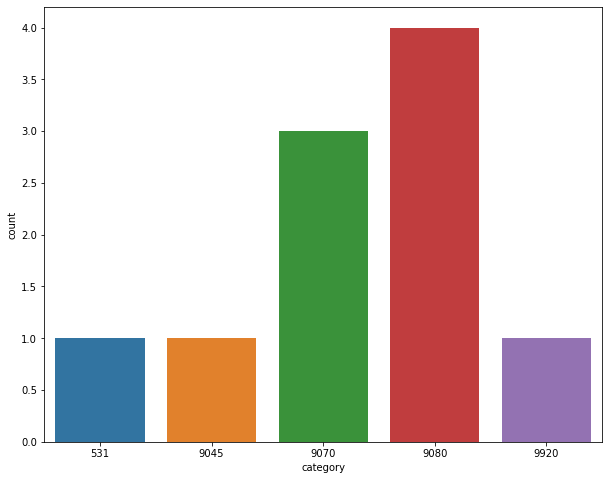

In [16]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each category using bars
sns.countplot(x='category', data=InStock[:10])

# Display the figure
plt.show()

# Q.3. Which is the products where you have seen a decrease in price?

In [40]:
Prod = pd.DataFrame(InStock, columns = ['category', 'manufacturer', 'part_number', 'price'])
minvalue_series = Prod.min(axis = 0)
minvalue_series

category                                    1
manufacturer    3M - OPTICAL SYSTEMS DIVISION
part_number                           0-00496
price                                     0.0
dtype: object

# Q.4. Which is the product where you have seen an increase in the price?

In [41]:
Prod = pd.DataFrame(InStock, columns = ['category', 'manufacturer', 'part_number', 'price'])
maxvalue_series = Prod.max(axis = 0)
maxvalue_series

category            9999
manufacturer       ZYXEL
part_number     ZUCUBJCK
price           69729.03
dtype: object

# Q.5. Which is the top category by price and quantity?

In [49]:
Cate = pd.DataFrame(InStock, columns = ['category', 'price', 'qty'])
maxvalue_series = Cate.max(axis = 0)
maxvalue_series

category     9999.00
price       69729.03
qty         60063.00
dtype: float64

# Q.6. Which Products are aging?

In [24]:
# Deleting columns other than products,sku_create_date and quantity
Idata3 = InStock.drop(["status", "description", "manufacturer","price","sku", "alt_sku", "category"], axis = 1 )
Idata3

,part_number,qty,sku_create_date
253,3200943,7,2020-08-17
271,7206-0,2,2020-08-17
320,SAC5070-800CR,3,2020-08-17
324,KT-CLMPT-RS507-01R,115,2020-08-17
326,KT-PAD-RS507-10R,42,2020-08-17
...,...,...,...
2627921,93975,12,2020-08-28
2627922,93975,12,2020-08-28
2627923,93975,12,2020-08-28
2627924,93975,12,2020-08-28


In [25]:
# Grouping products by quantity
IA = pd.DataFrame(Idata3.groupby('part_number').sum()['qty'])

# Sorting the dataframe in descending order
IA.sort_values(by=['qty'], inplace=True, ascending=False)

# First 10 products
IA[10:]

,qty
part_number,
VA2446MH-LED,485590
VG2439SMH,458528
920-002714,425833
808-3105,419987
P134-06N-VGA,419067
...,...
LQH-00001,1
DTEG2/128GB,1
WD4NPURX,1


# Q.7. How to Drecrese Product Aging?

# For data not in Stock:

In [26]:
NoStock=imus[imus["status"]=="No Stock"]
NoStock

,category,manufacturer,part_number,sku,alt_sku,description,status,qty,price,sku_create_date
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,NaN,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,NaN,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,NaN,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,NaN,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,NaN,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17
...,...,...,...,...,...,...,...,...,...,...
2627418,3360,TARGUS,AMB580TT,9X4546,NaN,"B580 BLUETOOTH MOUSE BLCK,",No Stock,0,19.53,2020-08-28
2627775,505,ENGENIUS,EAP1300,9Z0170,NaN,"11AC WAVE 2 INDOOR WRLS AP,",No Stock,0,85.24,2020-08-28
2627822,9910,KINGSTON,HX-MPFS-SM,9Z6619,NaN,"HYPERX FURY S PRO GAMING, MOUSE PAD SMALL",No Stock,0,13.75,2020-08-28
2627853,291,KINGSTON TECHNOLOGY FLASH,SD10VG2/16GBCP,9Z8507,NaN,"BULK 16GB SDHC CLASS 10 UHS-I, 45R MUST ORDER ...",No Stock,0,16.51,2020-08-28


# Q.1. Which are the top manifacturer with price and Quantity?

In [48]:
Mani1 = pd.DataFrame(NoStock, columns = ['manufacturer', 'price', 'qty'])
maxvalue_series = Mani1.max(axis = 0)
maxvalue_series

manufacturer    ZYXEL -LICENSING
price                 84974533.1
qty                            0
dtype: object

# Q.2. Which are the most Profitable products?

In [30]:
NoStock['category'].describe()

count    1.914138e+06
mean     2.040982e+03
std      2.412605e+03
min      1.000000e+00
25%      6.610000e+02
50%      1.221000e+03
75%      2.240000e+03
max      9.999000e+03
Name: category, dtype: float64

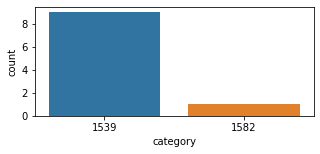

In [31]:
# Setting the figure size
plt.figure(figsize=(5, 2))

# countplot: Show the counts of observations in each category using bars
sns.countplot(x='category', data=NoStock[:10])

# Display the figure
plt.show()

# Q.3.Which is the product where you have seen a decrease in the price?

In [42]:
Prod1 = pd.DataFrame(NoStock, columns = ['category', 'manufacturer', 'part_number', 'price'])
minvalue_series = Prod1.min(axis = 0)
minvalue_series

category              1
manufacturer    22MILES
part_number     +APCSMB
price               0.0
dtype: object

# 4. Which is the product where you have seen an increase in the price?

In [44]:
Prod1 = pd.DataFrame(NoStock, columns = ['category', 'manufacturer', 'part_number', 'price'])
maxvalue_series = Prod1.max(axis = 0)
maxvalue_series

category                    9999
manufacturer    ZYXEL -LICENSING
part_number          ZYWALLVPN50
price                 84974533.1
dtype: object

# 5.Which is the top category by price and quantity?

In [51]:
Cate1 = pd.DataFrame(NoStock, columns = ['category', 'price', 'qty'])
maxvalue_series = Cate1.max(axis = 0)
maxvalue_series

category        9999.0
price       84974533.1
qty                0.0
dtype: float64

## Conclusion

* From Above Information we can conclude ZYXEL are the Top Manufacturer in both case instock as well as Nostock